In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime

In [2]:
OptInfo = {}
OptInfo['Bounds Longitude']     = [230,360]
OptInfo['Bounds Latitude']      = [-80,-40]
OptInfo['Grid Spacing (dx,dy)'] = [5,2.5]
OptInfo['Start Time']           = '2017-05-01'
OptInfo['End Time']             = '2017-06-01'
OptInfo['WayPoints']            = pd.read_csv('../../resources/WayPoints_TestExample3.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = False
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

In [3]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(OptInfo)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(0)

In [4]:
TT = TravelTime(cellGrid)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = WP1 ===
=== Processing Waypoint = WP2 ===


(-65.0, -50.0)

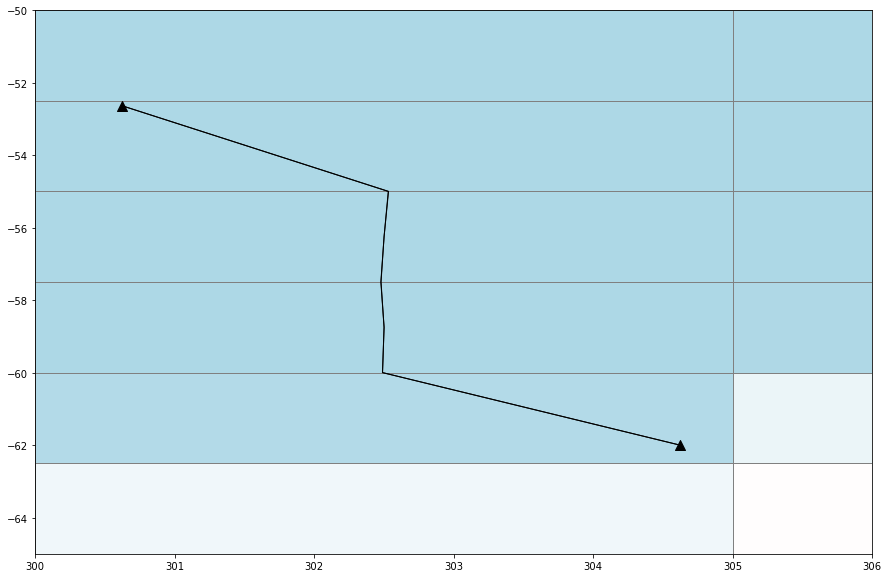

In [5]:
#Plotting the python paths
ax = TT.PlotPaths()
ax.set_xlim([300,306])
ax.set_ylim([-65,-50])

In [6]:
TT.PathSmoothing()

 PATH: WP1 -> WP2 
Sp=(300.62,-52.63472222222222);Cp=(302.53007681862306,-55.0);Np=(302.4782698333691,-57.5)
Box1=(-53.81736111111111,301.57503840931156);Box2=(-56.25,302.5041733259961)
Sp=(301.523407368131,-55.0);Cp=(302.4782698333691,-57.5);Np=(302.4892267852527,-60.0)
Box1=(-56.25,302.00083860075006);Box2=(-58.75,302.4837483093109)
Sp=(302.00631901427283,-57.5);Cp=(302.4892267852527,-60.0);Np=(304.62,-62.0)
Box1=(-58.75,302.24777289976277);Box2=(-61.0,303.5546133926264)
Sp=(300.62,-52.63472222222222);Cp=(301.523407368131,-55.0);Np=(302.00631901427283,-57.5)
Box1=(-53.81736111111111,301.0717036840655);Box2=(-56.25,301.7648631912019)
Sp=(301.2939664553361,-55.0);Cp=(302.00631901427283,-57.5);Np=(303.45836459559024,-60.0)
Box1=(-56.25,301.6501427348045);Box2=(-58.75,302.73234180493154)
Sp=(302.37616635640325,-57.5);Cp=(303.45836459559024,-60.0);Np=(304.62,-62.0)
Box1=(-58.75,302.9172654759967);Box2=(-61.0,304.03918229779515)
Sp=(300.62,-52.63472222222222);Cp=(301.2939664553361,-55.0);N

(-65.0, -50.0)

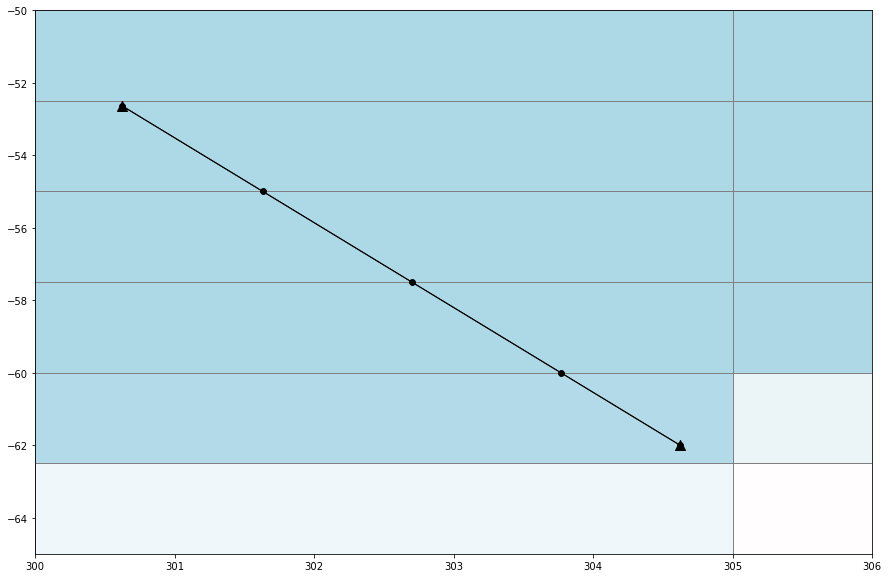

In [7]:
#Plotting the python paths
ax = TT.PlotPaths(routepoints=True)
ax.set_xlim([300,306])
ax.set_ylim([-65,-50])